## CSCS530 Winter 2015
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2015)

  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2015
  * Schedule: Wednesdays and Friday, 1:00-2:30PM ET
  * Location: 120 West Hall (http://www.lsa.umich.edu/cscs/research/computerlab)
  * Teachers: [Mike Bommarito](https://www.linkedin.com/in/bommarito) and [Sarah Cherng](https://www.linkedin.com/pub/sarah-cherng/35/1b7/316)

#### [View this repository on NBViewer](http://nbviewer.ipython.org/github/mjbommar/cscs-530-w2015/tree/master/)


# Basic Distributions
 
 From page 5 of [Thinking Complexity](http://www.greenteapress.com/compmod/thinkcomplexity.pdf):
 
 > __Deterministic → stochastic__: Classical models are usually deterministic, which may reflect
 > underlying philosophical determinism, discussed in Chapter 6; complex models often
 > feature randomness.
 
 In order to incorporate randomness into our models, we need to understand basic distributions and learn how to work with them in Python.  The notebook below covers the basic shape, parameters, and sampling of the following distributions:
  
 * uniform discrete
 * uniform continuous
 * normal/Gaussian ("bell curve")
 * Poisson 

In [1]:
# Imports
import numpy
import scipy.stats
import matplotlib.pyplot as plt

# Setup seaborn for plotting
import seaborn; seaborn.set()

# Import widget methods
from IPython.html.widgets import *

## Continuous Uniform distribution

 The [continous uniform distribution](http://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) is one of the most commonly utilized distributions.  As its name implies, it is characterized by a __uniform__ or __equal__ probability of any point being drawn from the distribution.  This is clear from the [probability density function (PDF)](http://en.wikipedia.org/wiki/Probability_density_function) below:

 ![caption](http://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/250px-Uniform_Distribution_PDF_SVG.svg.png)

 We can sample a continuous uniform distribution using the [``numpy.random.uniform``](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) method below.

### Draw a continuous uniform sample

  In the example below, we draw __``size=3``__ samples from a continous uniform distribution with range from ``-1`` to ``+1``.

In [8]:
numpy.random.uniform(-1, 1, size=3)

array([ 0.50106785,  0.09801508, -0.34788032])

### Visualize a continuous uniform sample

  In the example below, we will visualize the distribution of __``size=100``__ continous uniform samples.  This particular type of visualization is called a [histogram](http://en.wikipedia.org/wiki/Histogram).

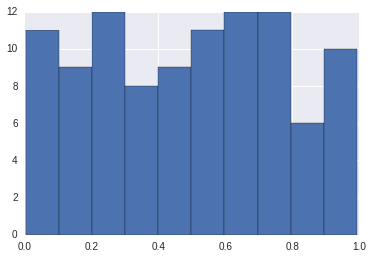

In [11]:
%matplotlib inline

# Sample random data
r = numpy.random.uniform(0, 1, size=100)
p = plt.hist(r)

## Interactive exploration of continuous uniform distribution

  In the interactive tool below, we will explore how a random sample drawn from the continuous uniform distribution varies with:
  
  * minimum and maximum of range (range_min, range_max)
  * number of samples drawn (samples)
  

  Try varying the number of samples in the single digits, then slowly increase the number to 1000.  How does the "smoothness" of the average sample vary?  Compare to the probability density function figure above.

<function __main__.plot_continuous_uniform>

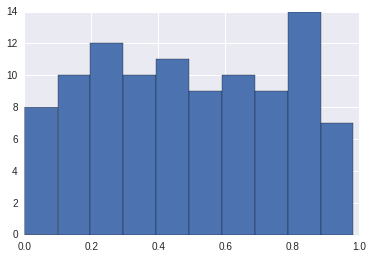

In [15]:
def plot_continuous_uniform(range_min=0, range_max=1, samples=100):
    """
    A continuous uniform plotter that takes min/max range and sample count.
    """
    
    # Check assertions
    assert (range_min < range_max)
    assert (samples > 1)
    
    # Sample random data
    r = numpy.random.uniform(range_min, range_max, samples)
    p = plt.hist(r)

# Call the ipython interact() method to allow us to explore the parameters and sampling
interact(plot_continuous_uniform, range_min=(0, 10),
         range_max = (1, 20),
         samples = (2, 1000))

## Discrete Uniform distribution

 The [discrete uniform distribution](http://en.wikipedia.org/wiki/Uniform_distribution_(discrete)) is another commonly utilized distributions.  As its name implies, it is characterized by a __uniform__ or __equal__ probability of any point being drawn from the distribution.  This is clear from the [probability density function (PDF)](http://en.wikipedia.org/wiki/Probability_density_function) below:

 ![caption](http://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Uniform_discrete_pmf_svg.svg/325px-Uniform_discrete_pmf_svg.svg.png)

 We can sample a discrete uniform distribution using the [``numpy.random.randint``](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) method below.

### Draw a discrete uniform sample

  In the example below, we draw __``size=3``__ samples from a discrete uniform distribution with range from ``0`` to ``10``.

In [17]:
numpy.random.randint(0, 10, size=3)

array([6, 0, 7])

### Visualize a discrete uniform sample

  In the example below, we will visualize the distribution of __``size=100``__ discrete uniform samples.

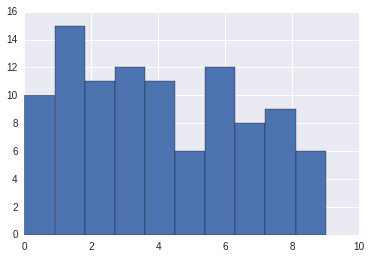

In [18]:
# Sample random data
r = numpy.random.randint(0, 10, size=100)
p = plt.hist(r)

## Interactive exploration of discrete uniform distribution

  In the interactive tool below, we will explore how a random sample drawn from the discrete uniform distribution varies with:
  
  * minimum and maximum of range (range_min, range_max)
  * number of samples drawn (samples)
  

  Try varying the number of samples in the single digits, then slowly increase the number to 1000.  How does the "smoothness" of the average sample vary?  Compare to the probability density function figure above.

<function __main__.plot_discrete_uniform>

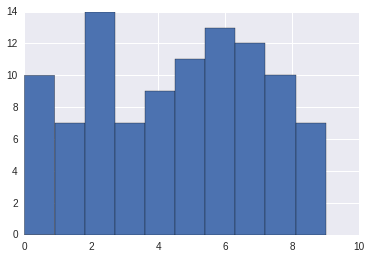

In [25]:
def plot_discrete_uniform(range_min=0, range_max=10, samples=100):
    """
    A discrete uniform plotter that takes min/max range and sample count.
    """
    
    # Check assertions
    assert (range_min < range_max)
    assert (samples > 1)

    # Sample random data
    r = numpy.random.randint(range_min, range_max, samples)
    p = plt.hist(r)

# Call the ipython interact() method to allow us to explore the parameters and sampling
interact(plot_discrete_uniform, range_min=(-10, 10),
         range_max = (-9, 20),
         samples = (2, 1000))

## Normal distribution

 The [normal distribution](http://en.wikipedia.org/wiki/Normal_distribution), commonly referred to as the "bell curve", is one of the most commmonly occuring continuous distributions in nature.  It is characterized by its __symmetry__ and its dispersion parameter, referred to as __standard deviation__.  68% of the distribution's probability mass falls within +/-1 standard deviation, and 95% of the probability mass falls within +/-2 standard deviations.
 
 The normal distribution's [probability density function (PDF)](http://en.wikipedia.org/wiki/Probability_density_function) is below:
 ![caption](http://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/350px-Normal_Distribution_PDF.svg.png)

 We can sample a normal distribution using the [``numpy.random.normal``](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) method below.

### Draw a normal sample

  In the example below, we draw __``size=3``__ samples from a normal distribution with ``mean=10`` and standard deviation ``sigma=3``.

In [28]:
numpy.random.normal(10, 3, size=3)

array([ 14.82031273,   9.11122324,  11.88380014])

### Visualize a normal sample

  In the example below, we will visualize the distribution of __``size=100``__ normal samples.

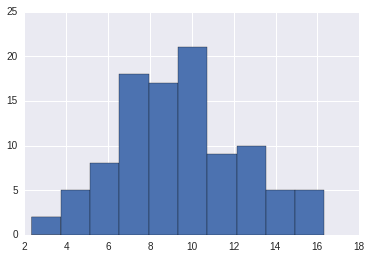

In [34]:
# Sample random data
r = numpy.random.normal(10, 3, size=100)
p = plt.hist(r)

## Interactive exploration of normal distribution

  In the interactive tool below, we will explore how a random sample drawn from the normal distribution varies with:
  
  * mean
  * standard deviation
  * number of samples drawn (samples)
  
 
  In addition to a histogram, this tool also shows a [kernel density estimate (KDE)](http://en.wikipedia.org/wiki/Kernel_density_estimation).  We can use KDEs to provide us with estimates of probability density functions, either for analysis and comparison or to use in further generative contexts to sample new values.
  

<function __main__.plot_normal>

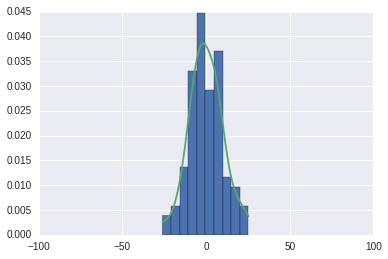

In [38]:
def plot_normal(mean=0, standard_deviation=10, samples=100, window_range=100):
    # Check assertions
    assert (standard_deviation > 0)
    assert (samples > 1)
    
    # Sample random data and visualization
    r = numpy.random.normal(mean, standard_deviation, 
                            size=samples)
    p = plt.hist(r, normed=True)
    
    # Calculate the kernel density estimate and overplot it on the histogram
    kernel = scipy.stats.gaussian_kde(r)
    r_range = numpy.linspace(min(r), max(r))
    plt.plot(r_range, kernel(r_range))
    
    # Set the x limits
    plt.xlim(min(-window_range, min(r)), max(window_range, max(r)))

# Create the widget
interact(plot_normal, mean=(-25, 25),
         standard_deviation = (1, 100),
         samples = (2, 1000),
         window_range = (1, 100))

## Poisson distribution

 The [Poisson distribution](http://en.wikipedia.org/wiki/Poisson_distribution) is, in Wikipedia's words:
 > a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of
 > time and/or space if these events occur with a known average rate and independently of the time since the last event. The
 > Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.
 
 The Poisson distribution's [probability density function (PDF)](http://en.wikipedia.org/wiki/Probability_density_function) is below:
 ![caption](http://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/325px-Poisson_pmf.svg.png)

 We can sample a normal distribution using the [``numpy.random.poisson``](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html) method below.

### Draw a Poisson sample

  In the example below, we draw __``size=3``__ samples from a Poisson distribution with ``rate=5``.

In [40]:
numpy.random.poisson(5, size=3)

array([6, 2, 3])

### Visualize a Poisson sample

  In the example below, we will visualize the distribution of __``size=100``__ Poisson samples.

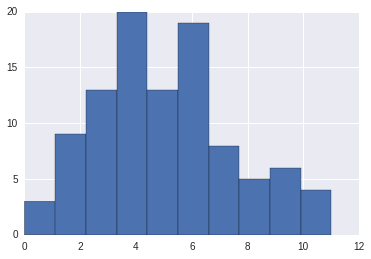

In [41]:
# Sample random data
r = numpy.random.poisson(5, size=100)
p = plt.hist(r)

## Interactive exploration of Poisson distribution

  In the interactive tool below, we will explore how a random sample drawn from the Poisson distribution varies with:
  
  * rate
  * number of samples drawn (samples)
  
 
  In addition to a histogram, this tool again shows a [kernel density estimate (KDE)](http://en.wikipedia.org/wiki/Kernel_density_estimation).  Compare the KDE to the probability density function above.
  

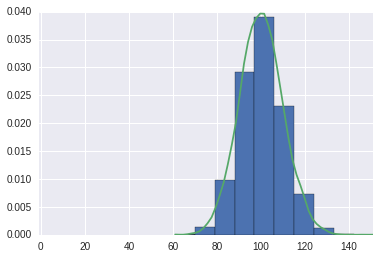

In [44]:
def plot_poisson(rate=5, samples=100, window_range=20):
    # Check assertions
    assert (rate > 0)
    assert (samples > 1)
    
    # Sample random data
    r = numpy.random.poisson(rate, size=samples)
    f = plt.figure()
    p = plt.hist(r, normed=True)
    
    # Calculate the KDE and overplot
    kernel = scipy.stats.gaussian_kde(r)
    r_range = numpy.linspace(min(r), max(r))
    plt.plot(r_range, kernel(r_range))
    
    # Set the x limits
    plt.xlim(-1, max(max(r), window_range))

# Create the ipython widget
interact(plot_poisson, rate=(1, 100),
         samples = (2, 10000),
         window_range = (1, 100))